In [1]:
# Load the libraries
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
import os

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 30, 20

In [10]:
file = 'arbitrage.py'

In [11]:
with open(file) as f:
    content = f.readlines()

In [13]:
content[0:30]

['"""\n',
 'Arbitrage library. Takes in orderbooks and gives back information about arbitrage\n',
 'opportunities present in them.\n',
 '\n',
 'The current orderbook format is a dictionary of bid and ask exchange orders. This could\n',
 'be changed as part of a larger refactor to bring all our orderbook representations to a\n',
 'single standard.\n',
 '\n',
 'IMPORTANT:\n',
 "  - the 'Order' used here is gryphon.lib.exchange.exchange_order, not the database\n",
 '    order model.\n',
 '"""\n',
 '\n',
 'from collections import defaultdict\n',
 'import itertools\n',
 '\n',
 'from cdecimal import Decimal\n',
 '\n',
 'from gryphon.lib.logger import get_logger\n',
 'from gryphon.lib.models.emeraldhavoc.orderbook import Orderbook\n',
 'from gryphon.lib.money import Money\n',
 'from gryphon.lib.metrics import midpoint\n',
 '\n',
 'logger = get_logger(__name__)\n',
 '\n',
 '\n',
 'CURRENCY_MISMATCH_ERROR_MESSAGE = """\\\n',
 'Orderbooks do not have the same volume currency. A: %s, B: %s\\\n',


In [14]:
content = [i.lstrip().rstrip() for i in content]
content[10:20]

['order model.',
 '"""',
 '',
 'from collections import defaultdict',
 'import itertools',
 '',
 'from cdecimal import Decimal',
 '',
 'from gryphon.lib.logger import get_logger',
 'from gryphon.lib.models.emeraldhavoc.orderbook import Orderbook']

In [22]:
values_2 = []

In [27]:
for i in content:
    if(i[0:5] == 'import' or i[0:4] == 'from'):
        values_2.append(i)

In [28]:
values_2

['import itertools',
 'from collections import defaultdict',
 'import itertools',
 'from cdecimal import Decimal',
 'from gryphon.lib.logger import get_logger',
 'from gryphon.lib.models.emeraldhavoc.orderbook import Orderbook',
 'from gryphon.lib.money import Money',
 'from gryphon.lib.metrics import midpoint',
 'from collections import defaultdict',
 'from cdecimal import Decimal',
 'from gryphon.lib.logger import get_logger',
 'from gryphon.lib.models.emeraldhavoc.orderbook import Orderbook',
 'from gryphon.lib.money import Money',
 'from gryphon.lib.metrics import midpoint']

In [ ]:
node_list = []

In [30]:
for i in values_2:
    temp = i.split()
    if(len(temp) == 2 and temp[0] == 'import'):
        node_list.append(temp[1])
    elif(len(temp) == 4 and temp[0] == 'import' and temp[2] == 'as'):
        node_list.append(temp[1])
    elif(len(temp) == 4 and temp[0] == 'from'):
        node_list.append(str(temp[1]) + '.' + str(temp[3]))
    elif()
    print(temp)
    print("EEEEE")

['import', 'itertools']
EEEEE
['from', 'collections', 'import', 'defaultdict']
EEEEE
['import', 'itertools']
EEEEE
['from', 'cdecimal', 'import', 'Decimal']
EEEEE
['from', 'gryphon.lib.logger', 'import', 'get_logger']
EEEEE
['from', 'gryphon.lib.models.emeraldhavoc.orderbook', 'import', 'Orderbook']
EEEEE
['from', 'gryphon.lib.money', 'import', 'Money']
EEEEE
['from', 'gryphon.lib.metrics', 'import', 'midpoint']
EEEEE
['from', 'collections', 'import', 'defaultdict']
EEEEE
['from', 'cdecimal', 'import', 'Decimal']
EEEEE
['from', 'gryphon.lib.logger', 'import', 'get_logger']
EEEEE
['from', 'gryphon.lib.models.emeraldhavoc.orderbook', 'import', 'Orderbook']
EEEEE
['from', 'gryphon.lib.money', 'import', 'Money']
EEEEE
['from', 'gryphon.lib.metrics', 'import', 'midpoint']
EEEEE


In [26]:
with open(files[3]) as f:
        content = f.readlines()

In [27]:
content[0:10]

['import pyximport; pyximport.install()\n',
 'from cdecimal import Decimal\n',
 'import inspect\n',
 'import os\n',
 'import signal\n',
 'import sys\n',
 'import time\n',
 '\n',
 'from delorean import Delorean\n',
 'import importlib\n']

In [28]:
values = []

In [10]:
for i in content:
    line = i.lstrip().rstrip()
    values.append(i)

NameError: name 'values' is not defined

In [29]:
def get_module_name(line):
    """Function takes a line and returns the name of module
    Parameters:
    line: str
    return: string
    """
    if("import" in line and "as" not in line and "from" not in line):
        return line.split()[1].lstrip().rstrip()
    elif("import" in line and "as" in line and "from" not in line):
        return line.split()[1].lstrip().rstrip()
    elif('from' in line and 'import' and "as" not in line):
        temp = line.split()
        print(temp)
        return str(temp[1].lstrip().rstrip()) + "." + str(temp[3].lstrip().rstrip())
    else:
        return "You dummy"

In [30]:
def stripping(content):
    for line in content:
        line = line.lstrip().rstrip()
        if("from" in line or "import" in line and '#' != line[0]):
            line = line.replace('\n', '')
            if(',' in line and 'import' in line and 'from' not in line):
                line = line.replace(',', ' ')
                temp = line.split()
                temp2 = temp[1:]
                for i in temp2:
                    i = i.lstrip().rstrip()
                    if(i != ''):
                        values.append(str(temp[0]) + " " + str(i))

            elif(',' in line and 'import' in line and 'from' in line and '#' != line[0]):
                temp = line.split(' import ')
                temp2 = ''.join(temp[1:]).split(',')
                for i in temp2:
                    values.append(str(temp[0]) + " import " + str(i.lstrip().rstrip()))
            else:
                values.append(line)

In [31]:
G = nx.Graph()

In [32]:
for filename in files:
    with open(filename) as f:
        content = f.readlines()
    
    values = []
    
    stripping(content)
    
#     for j in values:
#         print(j)
#         print("##")
#         print("$$")

    values_san = []
    for i in values:
        values_san.append(get_module_name(i))
        
    # add the head node which is the filename
    G.add_node(filename)
    
    # Eventually make a  list where I could have all the 
    default_moduels = []
    
    for i in values_san:
        if('.' not in i):
            G.add_edge(filename, i)
        else:
            temp = i.split('.')
            G.add_edge(filename, temp[0])
            j = 0
            while(j < len(temp)-1):
                G.add_edge(temp[j], temp[j+1])
                j += 1

['from', '__future__', 'import', 'print_function']
['from', 'operator', 'import', 'lt']
['from', 'operator', 'import', 'gt']
['from', 'operator', 'import', 'eq']
['from', 'operator', 'import', 'le']
['from', 'operator', 'import', 'ge']
['from', 'os.path', 'import', '(']
['from', 'distutils.version', 'import', 'StrictVersion']
['from', 'setuptools', 'import', '(']
['Source', 'trees', 'come', 'from', 'a', 'variety', 'of', 'places:']
['"tarball', 'from', 'tag"', 'feature']
['this', 'tool', 'is', 'format-agnostic)', 'can', 'come', 'from', 'a', 'variety', 'of', 'places:']
['just', 'omit', 'the', 'field', 'from', 'your', '`setup.cfg`.']
['`__version__`', '(by', 'calling', 'a', 'function', 'from', '`_version.py`)']
['Once', 'established,', 'all', 'uses', 'of', 'your', 'tree', 'from', 'a', 'VCS', 'checkout', 'should', 'get', 'the']
['importing', '`_version`', 'from', 'your', 'main', '`__init__.py`', 'file', 'and', 'running', 'the']
['from', '._version', 'import', 'get_versions']
['TAG[+DISTANC

IndexError: list index out of range

In [10]:
G.nodes()

NodeView(('catalyst-master/setup.py', '__future__', 'print_function', 'os', 're', 'sys', 'operator', 'lt', 'gt', 'eq', 'le', 'ge', 'path', '(', 'distutils', 'version', 'StrictVersion', 'setuptools', 'versioneer', 'Cython', 'Distutils', 'build_ext', ''))

In [11]:
G.edges()

EdgeView([('catalyst-master/setup.py', '__future__'), ('catalyst-master/setup.py', 'os'), ('catalyst-master/setup.py', 're'), ('catalyst-master/setup.py', 'sys'), ('catalyst-master/setup.py', 'operator'), ('catalyst-master/setup.py', 'distutils'), ('catalyst-master/setup.py', 'setuptools'), ('catalyst-master/setup.py', 'versioneer'), ('catalyst-master/setup.py', 'Cython'), ('catalyst-master/setup.py', ''), ('__future__', 'print_function'), ('os', 'path'), ('operator', 'lt'), ('operator', 'gt'), ('operator', 'eq'), ('operator', 'le'), ('operator', 'ge'), ('path', '('), ('(', 'setuptools'), ('distutils', 'version'), ('version', 'StrictVersion'), ('Cython', 'Distutils'), ('Distutils', 'build_ext')])

/home/data/anaconda3/envs/DataSci/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


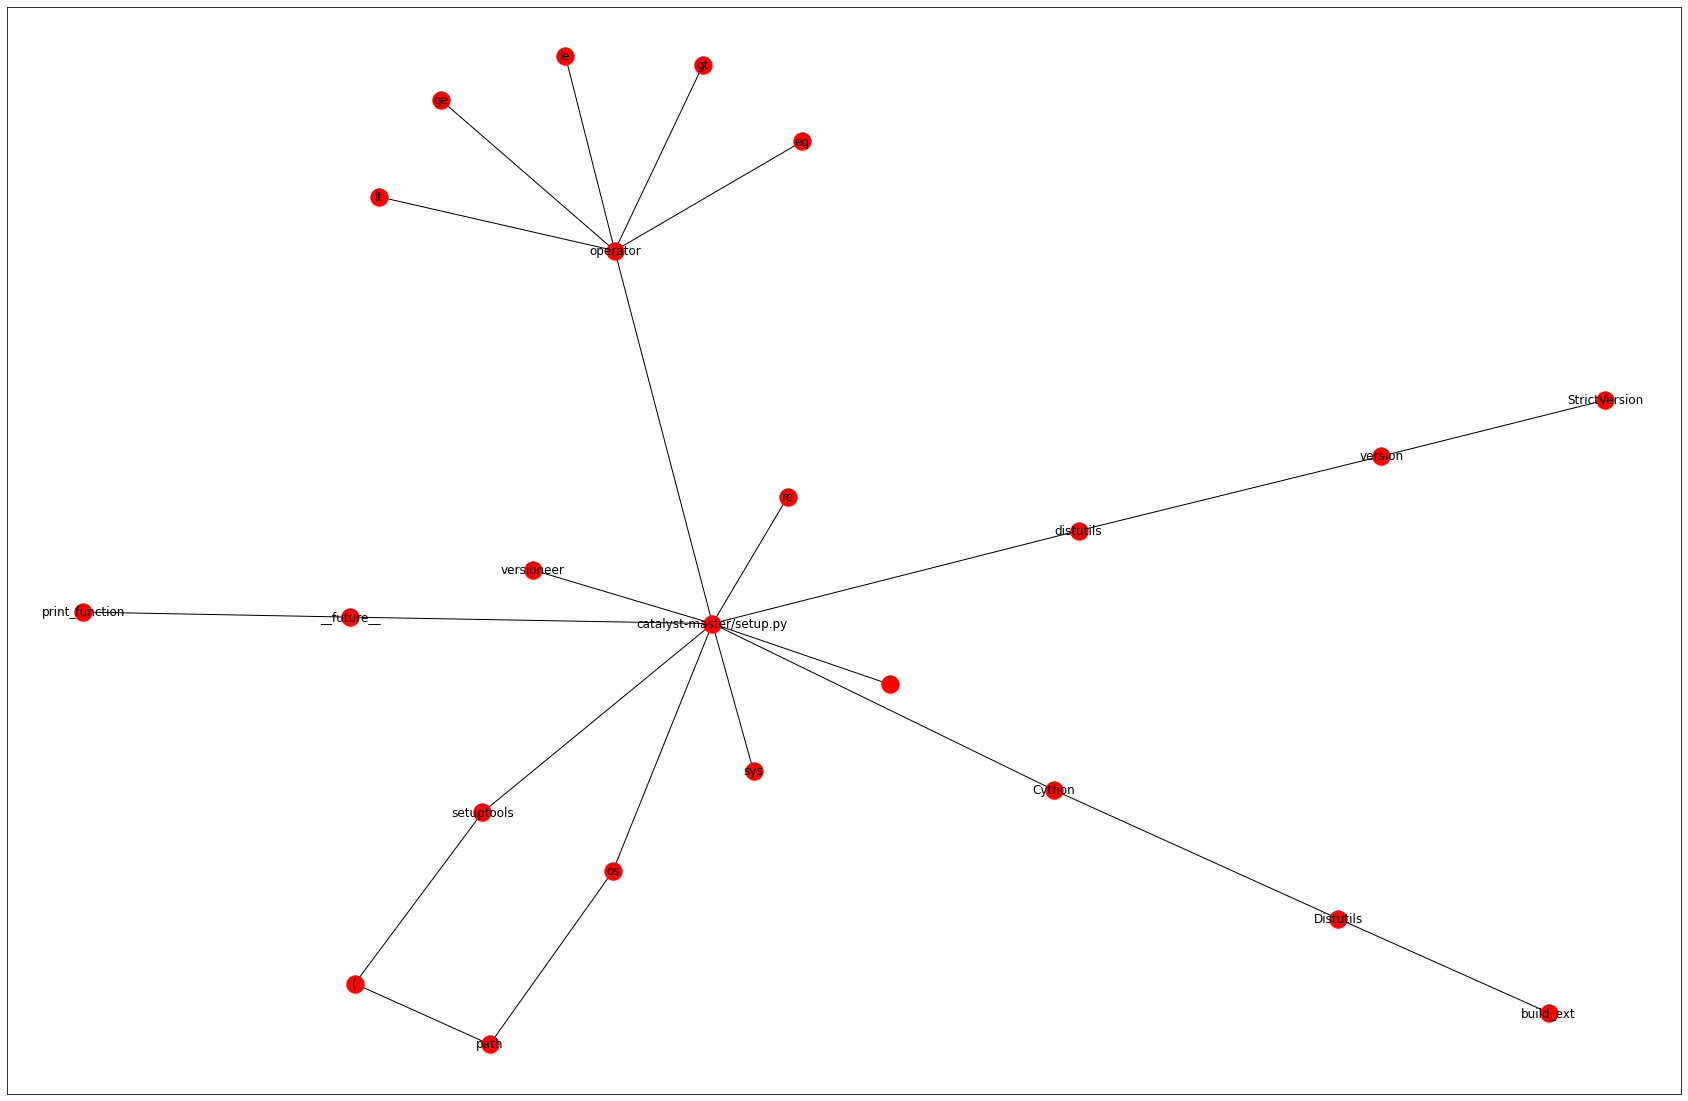

In [12]:
nx.draw_networkx(G, with_labels=True, node_color='r', font_color='k');